# Hello World

## Create and run a simple quantum program

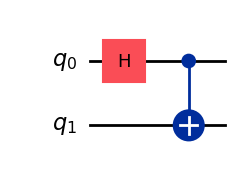

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib("mpl").
qc.draw("mpl")

In [25]:
# Set up six different observables

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

### Step 2: Optimize the circuits and operators

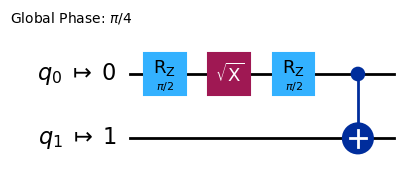

In [26]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2 as FakeManila
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Use a fake backend to simulate real hardware constrainsts
backend = FakeManila()

# Generate pass manager with layout and optimization
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

# Apply the pass manager to get ISA-mapped circuit
isa_circuit = pm.run(qc)

# Draw the ISA-mapped circuit
isa_circuit.draw("mpl", idle_wires=False)

### Step 3: Execute using the quantum primitives

In [27]:
# Use the following code instead if you want to run on the simulator:

from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeFez

backend = FakeFez()
estimator = Estimator(backend)

# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend, optimization_level= 1)
isa_circuit = pm.run(qc)
mapped_observables = [ observable.apply_layout(isa_circuit.layout) for observable in observables]

job = estimator.run([(isa_circuit, mapped_observables)])
result = job.result()


# This is the result of the entire submission. You submitted one Pub,
# so this contains one inner result (and some metadata of its own)

job_result = job.result()

# This is the result from our single pub, which had five observables,
# so contains information on all five.

pub_result = job.result()[0]

### Step 4: Analyze the results

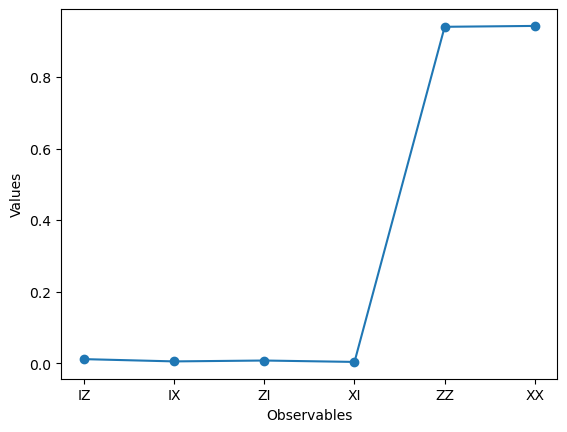

In [34]:
# Plot the results

from matplotlib import pyplot as plt

values = pub_result.data.evs

errors = pub_result.data.stds

# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()